In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../Dataset/train.csv")
dataset.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [4]:
experiment_dataset = dataset.drop(['index'], axis=1).copy()

In [36]:
fake = ['VCL6', 'VCL12', 'VCL13']
vcl_dataset = experiment_dataset[fake]
vcl_dataset

,VCL6,VCL12,VCL13
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
14995,0,1,1
14996,0,0,0
14997,0,0,1
14998,0,1,1


In [37]:
nerdiness = experiment_dataset.iloc[:, 68]
nerdiness

0        1
1        1
2        1
3        1
4        0
        ..
14995    0
14996    1
14997    1
14998    0
14999    1
Name: nerdiness, Length: 15000, dtype: int64

In [38]:
vcl_dataset=vcl_dataset.assign(sum="")
vcl_dataset

,VCL6,VCL12,VCL13,sum
0,0,0,0,
1,0,0,1,
2,0,0,1,
3,0,0,1,
4,0,0,0,
...,...,...,...,...
14995,0,1,1,
14996,0,0,0,
14997,0,0,1,
14998,0,1,1,


In [40]:
vcl_dataset['sum'] = vcl_dataset[fake].sum(axis=1)
vcl_dataset

,VCL6,VCL12,VCL13,sum
0,0,0,0,0
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,0,0
...,...,...,...,...
14995,0,1,1,2
14996,0,0,0,0
14997,0,0,1,1
14998,0,1,1,2


In [41]:
vcl_dataset = pd.concat([vcl_dataset, nerdiness], axis = 1)
vcl_dataset

,VCL6,VCL12,VCL13,sum,nerdiness
0,0,0,0,0,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
14995,0,1,1,2,0
14996,0,0,0,0,1
14997,0,0,1,1,1
14998,0,1,1,2,0


<AxesSubplot:>

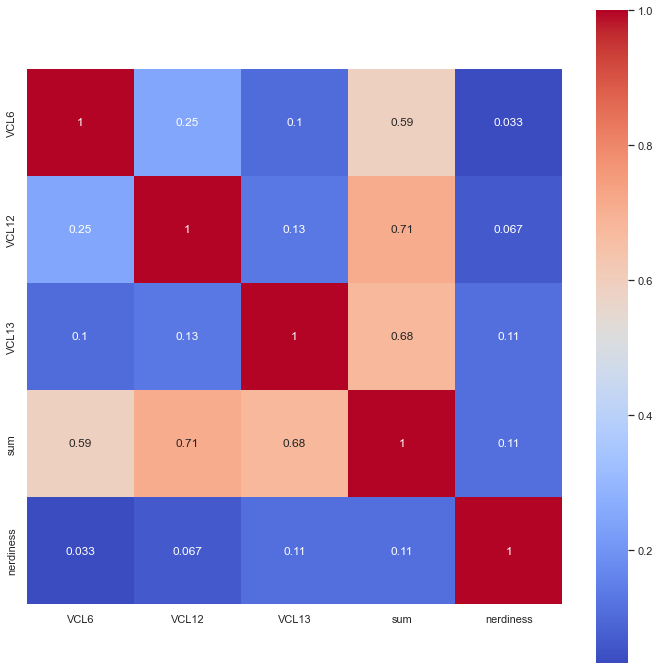

In [44]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(vcl_dataset.corr(), annot=True, cmap="coolwarm", square=True)

In [67]:
# sum >=2 이면서 nerdiness 인 사람

a = len(vcl_dataset.loc[(vcl_dataset['sum'] >= 2)])
b = len(vcl_dataset.loc[(vcl_dataset['sum'] >= 2) & (vcl_dataset['nerdiness'] == 1)])

c = len(vcl_dataset.loc[(vcl_dataset['sum'] == 2)])
d = len(vcl_dataset.loc[(vcl_dataset['sum'] ==2) & (vcl_dataset['nerdiness'] == 1)])
e = len(vcl_dataset.loc[(vcl_dataset['sum'] == 3)])
f = len(vcl_dataset.loc[(vcl_dataset['sum'] ==3) & (vcl_dataset['nerdiness'] == 1)])
print("sum은 fake 단어 중에서 몇개를 안다고 했는지")
print("======================================")
print("sum이 2인 사람 수 :",  c)
print("sum이 2인데 nerd인 사람 : ", d)
print("비율 : ", d/c  )
print("------------------------------------------")
print("sum이 3인 사람 수 :",  e)
print("sum이 3인데 nerd인 사람 : ", f)
print("비율 : ", f/e  )
print("------------------------------------------")
print("sum이 2이상인 사람 수 :",  a)
print("sum이 2이상인데 nerd인 사람 : ", b)
print("비율 : ", b/a  )

sum은 fake 단어 중에서 몇개를 안다고 했는지
sum이 2인 사람 수 : 2767
sum이 2인데 nerd인 사람 :  1696
비율 :  0.6129382002168413
------------------------------------------
sum이 3인 사람 수 : 705
sum이 3인데 nerd인 사람 :  459
비율 :  0.6510638297872341
------------------------------------------
sum이 2이상인 사람 수 : 3472
sum이 2이상인데 nerd인 사람 :  2155
비율 :  0.6206797235023042


In [69]:
# sum >=2 이면서 nerdiness 인 사람

a = len(vcl_dataset.loc[(vcl_dataset['sum'] ==0 )])
b = len(vcl_dataset.loc[(vcl_dataset['sum'] == 0) & (vcl_dataset['nerdiness'] == 1)])

c = len(vcl_dataset.loc[(vcl_dataset['sum'] == 1)])
d = len(vcl_dataset.loc[(vcl_dataset['sum'] ==1) & (vcl_dataset['nerdiness'] == 1)])
e = len(vcl_dataset.loc[(vcl_dataset['sum'] >= 1)])
f = len(vcl_dataset.loc[(vcl_dataset['sum'] >= 1) & (vcl_dataset['nerdiness'] == 1)])
print("sum은 fake 단어 중에서 몇개를 안다고 했는지")
print("======================================")
print("sum이 0 사람 수 :",  b)
print("sum이 0데 nerd인 사람 : ", a)
print("비율 : ", b/a  )
print("------------------------------------------")
print("sum이 1 사람 수 :",  c)
print("sum이 1데 nerd인 사람 : ", d)
print("비율 : ", d/c  )
print("------------------------------------------")
print("sum이 1상인 사람 수 :",  e)
print("sum이 1상인데 nerd인 사람 : ", f)
print("비율 : ", f/e  )

sum은 fake 단어 중에서 몇개를 안다고 했는지
sum이 0 사람 수 : 1380
sum이 0데 nerd인 사람 :  3083
비율 :  0.44761595848199803
------------------------------------------
sum이 1 사람 수 : 8445
sum이 1데 nerd인 사람 :  4768
비율 :  0.5645944345766726
------------------------------------------
sum이 1상인 사람 수 : 11917
sum이 1상인데 nerd인 사람 :  6923
비율 :  0.5809347990266006
